In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
# 对网络G进行可视化
def plot_graph(G):
    plt.figure(figsize =(20,12))    
    pos = nx.spring_layout(G)#布局
    edges = G.edges() #边
    nx.draw_networkx(G,pos,edgelist = edges)#绘制网络
    nx.draw_networkx_nodes(G,pos,nodelist = G.nodes(),node_size = 300,node_color = 'r',alpha = 0.8)#绘制顶点
    nx.draw_networkx_edges(G,pos,edgelist = edges,alpha = 0.4)#绘制边
    plt.show()   

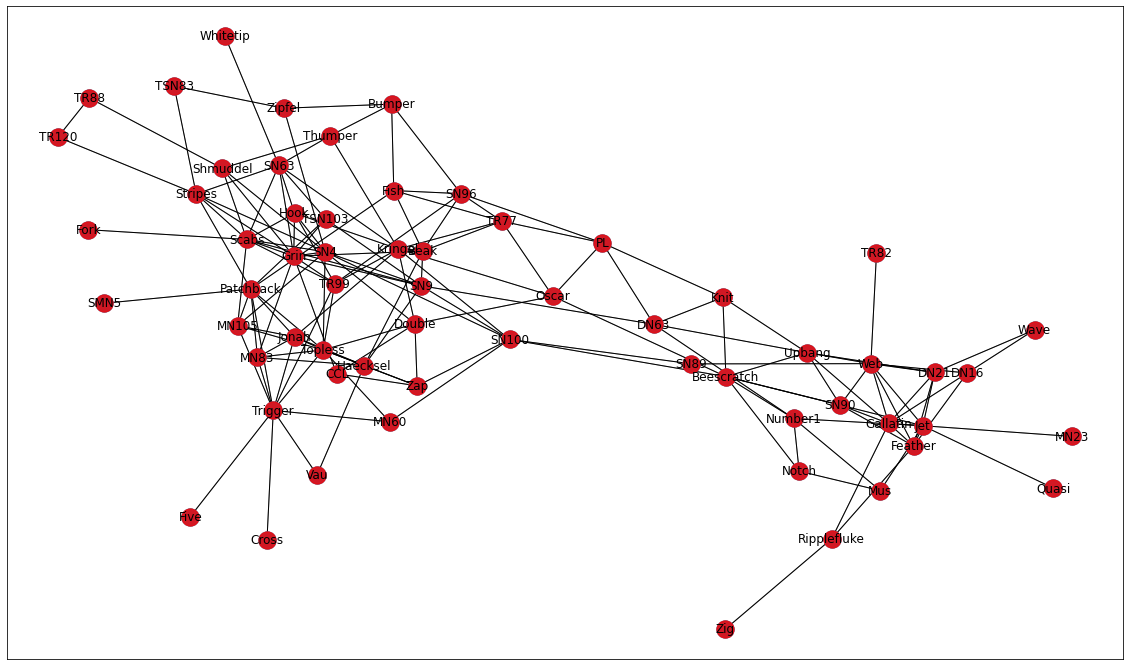

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [5]:
# 数据加载
G = nx.read_gml('./dolphins.gml')
# 可视化
plot_graph(G)
print(list(G.nodes()))

In [6]:
# 构建GCN,计算A_hat和D_hat矩阵
# 按字母顺序排序
order = sorted(list(G.nodes()))
print(order)
# 邻接矩阵
A = nx.to_numpy_matrix(G,nodelist = order)
# print(A)
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
# print(A_hat)
# D_hat为A_hat的度矩阵,得到对角线上的元素
D_hat = np.array(np.sum(A_hat,axis = 0))[0]
# print('D_hat = \n',D_hat)
# 得到对角矩阵
D_hat = np.matrix(np.diag(D_hat))
print('D_hat = \n',D_hat)

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
D_hat = 
 [[7. 0. 0. ... 0. 0. 0.]
 [0. 9. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 6. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [7]:
# 随机初始化权重
W_1 = np.random.normal(loc = 0,scale = 1,size = (G.number_of_nodes(),4))
W_2 = np.random.normal(loc = 0,size = (W_1.shape[1],2))
#print('W_1 = \n',W_1)
#print('W_2 = \n',W_2)

In [8]:
# 定义Relu
def relu(x):
    return (abs(x) + x) / 2

In [9]:
# 叠加GCN层
def gcn_layer(A_hat,D_hat,X,W):
    return relu(D_hat ** -1 * A_hat * X * W)

In [10]:
# 这里只使用单位矩阵作为特征表征，即每个节点被表示为一个one-hot编码的类别变量
H1 = gcn_layer(A_hat,D_hat,I,W_1)
H2 = gcn_layer(A_hat,D_hat,H1,W_2)

output = H2
print('output = /n',output)

output = /n [[0.0257809  0.13433724]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.23492272 0.08547653]
 [0.         0.09376509]
 [0.         0.01391908]
 [0.         0.        ]
 [0.19194255 0.        ]
 [0.         0.        ]
 [0.13860744 0.31573902]
 [0.45763679 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.18722407 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.27662887 0.        ]
 [0.01210345 0.03501552]
 [0.19202321 0.        ]
 [0.11984726 0.        ]
 [0.         0.        ]
 [0.25812701 0.        ]
 [0.15344996 0.        ]
 [0.00849246 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.28892114 0.10393743]
 [0.49082739 0.55175147]
 [0.09851341 0.        ]
 [0.         0.        ]
 [0.29997003 0.        ]
 [0.68460182 0.77986045]
 [0.04160493 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         

In [11]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations = \n',feature_representations)

feature_representations = 
 {'Beak': array([0.0257809 , 0.13433724]), 'Beescratch': array([0., 0.]), 'Bumper': array([0., 0.]), 'CCL': array([0., 0.]), 'Cross': array([0.23492272, 0.08547653]), 'DN16': array([0.        , 0.09376509]), 'DN21': array([0.        , 0.01391908]), 'DN63': array([0., 0.]), 'Double': array([0.19194255, 0.        ]), 'Feather': array([0., 0.]), 'Fish': array([0.13860744, 0.31573902]), 'Five': array([0.45763679, 0.        ]), 'Fork': array([0., 0.]), 'Gallatin': array([0., 0.]), 'Grin': array([0., 0.]), 'Haecksel': array([0.18722407, 0.        ]), 'Hook': array([0., 0.]), 'Jet': array([0., 0.]), 'Jonah': array([0.27662887, 0.        ]), 'Knit': array([0.01210345, 0.03501552]), 'Kringel': array([0.19202321, 0.        ]), 'MN105': array([0.11984726, 0.        ]), 'MN23': array([0., 0.]), 'MN60': array([0.25812701, 0.        ]), 'MN83': array([0.15344996, 0.        ]), 'Mus': array([0.00849246, 0.        ]), 'Notch': array([0., 0.]), 'Number1': array([0., 0.]), 'Os

In [12]:
# 绘制output,GCN embedding可视化
def plot_node(output,title):
    for i in range(len(nodes)):
        node_name = nodes[i]
        value = i
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1],label = str(i),alpha = 0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1],i,horizontalalignment = 'center',verticalalignment = 'center',fontdict = {'color':'black'})
    plt.title(title)
    plt.show()        

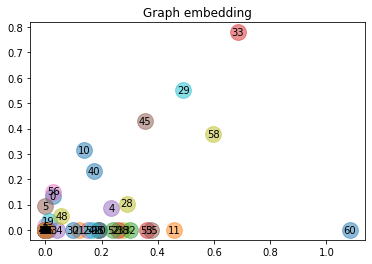

In [13]:
# 绘制output,GCN embedding可视化
plot_node(output,'Graph embedding')

In [14]:
#尝试去掉relu
def gcn_layer_without_relu(A_hat,D_hat,X,W):
    return D_hat ** -1 * A_hat * X * W

In [15]:
H1 = gcn_layer_without_relu(A_hat,D_hat,I,W_1)
H2 = gcn_layer_without_relu(A_hat,D_hat,H1,W_2)

output = H2
print('output without relu = \n',output)

output without relu = 
 [[-0.11390435  0.86311823]
 [-0.02528208  0.19920729]
 [-0.19357569  0.64237431]
 [ 0.25512391  1.07075325]
 [ 0.6042598   0.78968375]
 [-0.00935648  1.63686608]
 [-0.21174279  0.93696026]
 [ 0.18477919  0.48789355]
 [ 0.70312032  1.24031989]
 [-0.38406835  1.00975763]
 [-0.01853165  1.04578999]
 [ 0.9762353   0.18435728]
 [-1.06763691 -0.1299976 ]
 [-0.37595567  0.95572005]
 [-0.53035171 -0.08850616]
 [ 0.5717609   0.12675074]
 [-0.28194551 -0.03656144]
 [-0.72721924 -0.31781778]
 [ 0.51824139  0.24551472]
 [ 0.31472916  0.75650402]
 [ 0.53042709  0.39422127]
 [ 0.23601414  0.329159  ]
 [-0.48892516 -0.25502056]
 [ 0.82122566  0.15046506]
 [ 0.33820984  0.32732843]
 [-0.25919821 -1.21472063]
 [-0.32960068 -1.44309144]
 [-0.10581634 -0.68094632]
 [ 0.7658547   1.09987095]
 [ 0.91683481  1.82055869]
 [ 0.16670038  0.48711501]
 [-1.41992587 -0.63880427]
 [ 0.48453465  0.41303816]
 [ 0.68706757  2.64216768]
 [ 0.36252577 -0.05643689]
 [-0.32081288  0.0352318 ]
 [-0

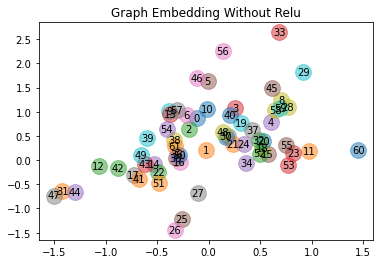

In [16]:
plot_node(output,'Graph Embedding Without Relu')